## Predicting diabetes for a person using the given data (diabetes.csv) 

* Objective : To build a model to find whether patient is suffering from diabetes or not. 
* Data Source: diabetes.csv

#### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
#seaborn
import seaborn as sns
#matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#sklearn
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


#### Reading the diabetes dataset :

In [2]:
# Making a list of missing value types
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Describing the dataset : 

In [3]:
#No of Rows, columns
print("Dimension of diabetes data: {}".format(df.shape))

Dimension of diabetes data: (768, 9)


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


* The average age of the people is 33 and max age is 81 yrs.
* Since , minimum age is 21 , the patient could be diabetic starting 21.
* Also, average glucose level & BP is 120 and 69 repsectively.
* Moreover, maximum pregancies recorded is as 17 people.

### Data Preparation and Cleaning
*  Finding the missing values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.Outcome.unique()

array([1, 0], dtype=int64)

* There are two outcomes - 1 : Diabetes and 0 : No - diabetes
* Out of these 768 data points, 500 are labeled as 0 and 268 as 1

In [7]:
print(df.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


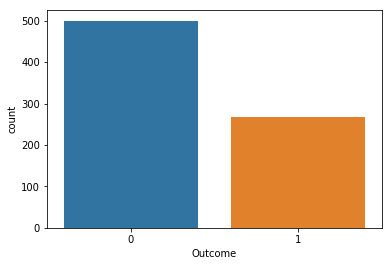

In [8]:
sns.countplot(x='Outcome',data=df)

##### Histogram distribution of data for a single column

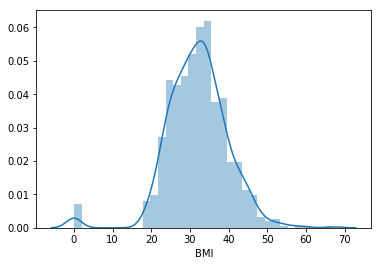

In [9]:
sns.distplot(df['BMI'], kde=True)

In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
# Total missing values(0) for each feature,
df.isin([0]).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

* There is no unknown or missing values.
* However, the count of null values seen from above table, we can infer that BMI, Glucose, Bloodpressure , Skin thickness, Insulin have value 0.
* Medical knowledge explains that such attributes cannot be 0 in a result, which implies missing data.

  

* Handling missing values : 
  * Fill in missing values of numeric data with appropriate methods

In [12]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.NaN)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [13]:
#all 0 replaced with NaN.
df.isin([0]).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

* For pregnancies, values of 0 could be allowed indicating no pregnancy. Hence, do not replace those.

### Data Preprocessing
#### Vizualising the data by using box plots for attributes, to find if there are any outliers present in the given data
* Strategy used : Use mean if there is no outliers , else use median.

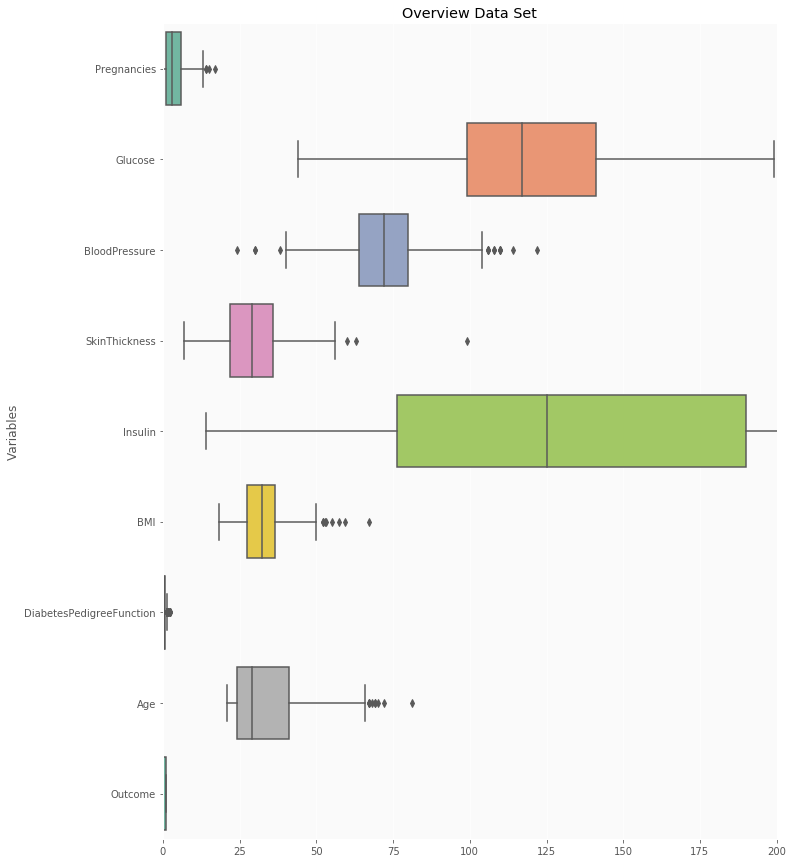

In [14]:
plt.style.use('ggplot') # Using ggplot2 style visuals 

f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = df, 
  orient = 'h', 
  palette = 'Set2')

In [15]:
df['Glucose'].fillna(df['Glucose'].mean(), inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].median(), inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace=True)
df['Insulin'].fillna(df['Insulin'].median(), inplace=True)
df['BMI'].fillna(df['BMI'].median(), inplace=True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


#### Checking for any correlation between independent attributes.
#####  Representing correlation matrix using a heatmap

In [16]:
correlations = df[df.columns[0:8]].corr()
correlations 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.127911,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341
Glucose,0.127911,1.000000,0.218557,0.192686,0.419064,0.231128,0.137060,0.266534
BloodPressure,0.208615,0.218557,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915
SkinThickness,0.081770,0.192686,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107
Insulin,0.025047,0.419064,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101
BMI,0.021559,0.231128,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561
Age,0.544341,0.266534,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000


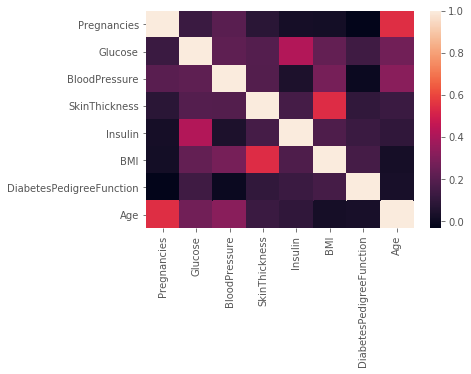

In [17]:
sns.heatmap(df[df.columns[0:8]].corr())

* Displaying with the correlation co-efficients.

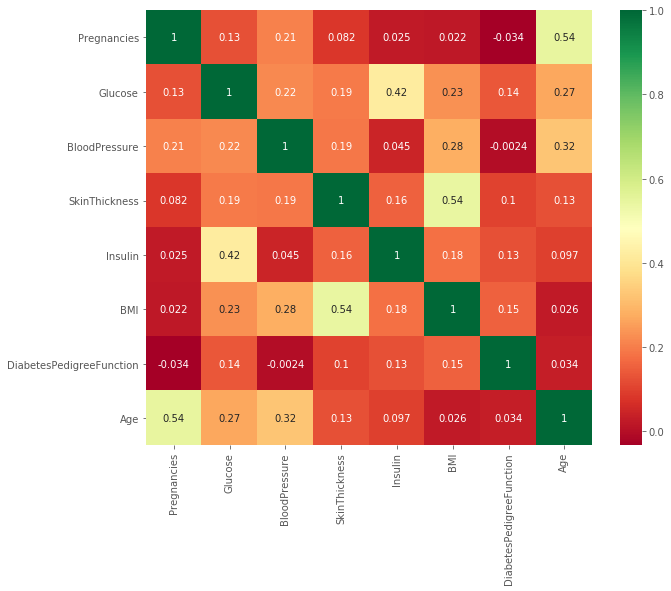

In [18]:
sns.heatmap(df[df.columns[0:8]].corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

* Since there is no value > 0.75 , there is no correlation between independent variables.
* All the features look to be uncorrelated. So we cannot eliminate any features just by looking at the correlation matrix.

##### Distribution pairplot that basically plots a joint plot for all the possible combination of numeric and Boolean columns in dataset

* For instance, vizualisation of the data for any correlation between Glucose Vs Insulin is as below,

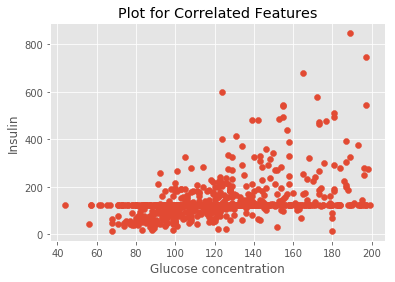

In [19]:
def visualise(df):
    fig, ax = plt.subplots()
    ax.scatter(df.iloc[:,1].values, df.iloc[:,4].values)
    ax.set_title('Plot for Correlated Features')
    ax.set_xlabel('Glucose concentration')
    ax.set_ylabel('Insulin')

visualise(df) 

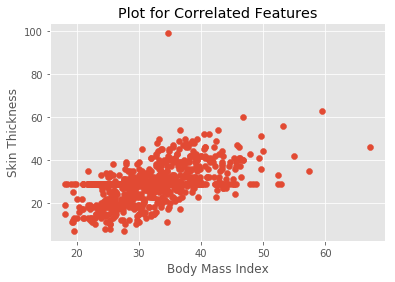

In [20]:
def visualise(df):
    fig, ax = plt.subplots()
    ax.scatter(df.iloc[:,5].values, df.iloc[:,3].values)
    ax.set_title('Plot for Correlated Features')
    ax.set_xlabel('Body Mass Index')
    ax.set_ylabel('Skin Thickness')

visualise(df) 

* The BMI index of people in the range 20-40 have a skin thickness between 20 to 40.



* Bar plot for BMI against age 

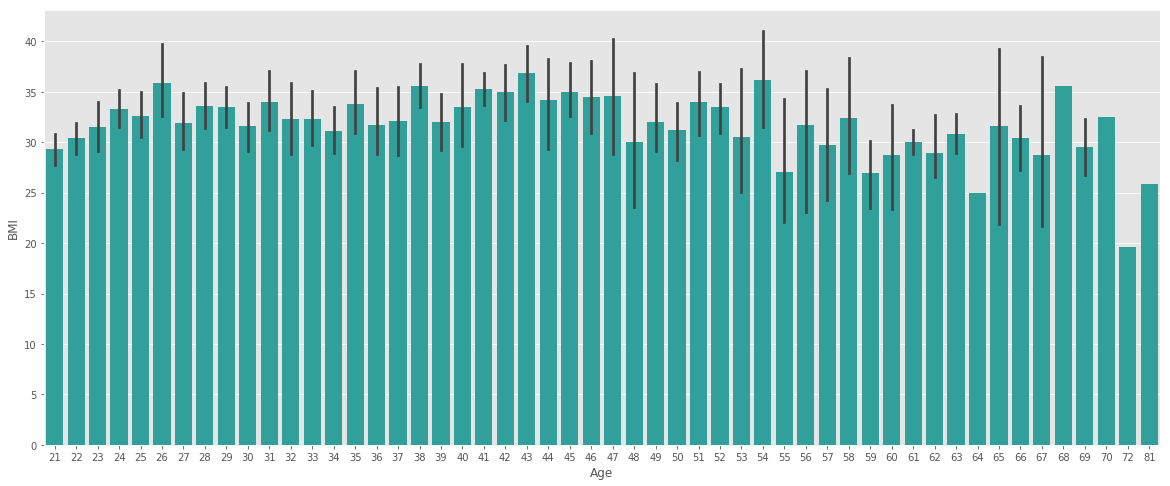

In [21]:
plt.figure(figsize=(20,8))
avg_survival_byage = df[["Age", "BMI"]].groupby(['Age'], as_index=False).mean()
g = sns.barplot(x='Age', y='BMI', data=df, color="LightSeaGreen")
plt.show()

#### Splitting the data into X (independent attributes) and Y for class

In [22]:
#Splitting the data into X (independent attributes) and Y for class
X = df.iloc[:, 0:7].values
y = df.iloc[:, 8].values

#### Standardizing the data for model evaluation and selection

In [23]:
sc = StandardScaler()
X = sc.fit_transform(X) 

* Transforming data to have a mean of zero and a standard deviation of 1.

In [24]:
mean = np.mean(X, axis=0)
print('Mean: (%d, %d)' % (mean[0], mean[1]))
standard_deviation = np.std(X, axis=0)
print('Standard deviation: (%d, %d)' % (standard_deviation[0], standard_deviation[1])) 

Mean: (0, 0)
Standard deviation: (1, 1)


In [25]:
#print the first 10 in the list.
print(X[0:10,:])

[[ 0.63994726  0.86510807 -0.03198993  0.67064253 -0.18154124  0.16661938
   0.46849198]
 [-0.84488505 -1.20616153 -0.5283186  -0.01230129 -0.18154124 -0.85219976
  -0.36506078]
 [ 1.23388019  2.0158134  -0.69376149 -0.01230129 -0.18154124 -1.33250021
   0.60439732]
 [-0.84488505 -1.07465235 -0.5283186  -0.69524511 -0.54064177 -0.63388137
  -0.92076261]
 [-1.14185152  0.50345782 -2.67907616  0.67064253  0.31656594  1.5493025
   5.4849091 ]
 [ 0.3429808  -0.18696538  0.13345296 -0.01230129 -0.18154124 -0.99774535
  -0.81807858]
 [-0.25095213 -1.4363026  -1.85186171  0.32917062 -0.61014509 -0.21179916
  -0.676133  ]
 [ 1.82781311 -0.21984267 -0.03198993 -0.01230129 -0.18154124  0.41404689
  -1.02042653]
 [-0.54791859  2.47609554 -0.19743282  1.80888223  4.66052389 -0.28457195
  -0.94794368]
 [ 1.23388019  0.10893028  1.95332473 -0.01230129 -0.18154124 -0.02258989
  -0.7244549 ]]


In [26]:
#ignoring the warning display
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

###### Splitting the dataset into the Training set and Test set

In [27]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [28]:
#Applying logistic regression
logreg = LogisticRegression(solver='lbfgs')
# fit the model with data
logreg.fit(X_train,y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

##### Training the model without cross validation

In [29]:
##Without cross validation
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}%".format(100*logreg.score(X_train, y_train)))
print("Test set score: {:.3f}%".format(100*logreg.score(X_test, y_test)))

Training set score: 77.281%
Test set score: 75.325%


* With C=1, accuracy is 77% on the training and 75% on the test data.

In [30]:
logreg001 = LogisticRegression(C=0.001).fit(X_train, y_train)
print("Training set accuracy: {:.3f}%".format(100*logreg001.score(X_train, y_train)))
print("Test set accuracy: {:.3f}%".format(100*logreg001.score(X_test, y_test)))

Training set accuracy: 76.909%
Test set accuracy: 73.160%


* Using C=0.001 results in comparitively more accuracy on the test sets.

In [31]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set accuracy: {:.3f}%".format(100* logreg100.score(X_train, y_train)))
print("Test set accuracy: {:.3f}%".format(100* logreg100.score(X_test, y_test)))

Training set accuracy: 77.467%
Test set accuracy: 74.892%


In [32]:
y_pred=logreg100.predict(X_test) 
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix : \n',cnf_matrix)

Confusion Matrix : 
 [[125  26]
 [ 32  48]]


* Using C=1 , 0.001 and 100, comparing accuracy results in both training and on the test sets.

#### Performing 10-fold cross validation 

In [33]:
##With 10fold cross validation
models = []
models.append(('logreg', LogisticRegression()))

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=42)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, 100* cv_results.mean(), cv_results.std())
    print(msg)

logreg: 76.701607 (0.049597)


* Logistic Regression upon cross validation has an accuracy of approx 76.7%

#### Compute the accuracy and confusion matrix

Text(0.5, 257.44, 'Predicted label')

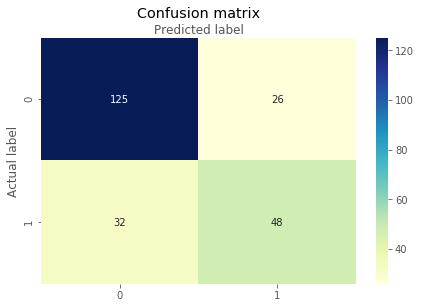

In [34]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label') 

In [35]:
#preditcions 
predictions = logreg.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81       151
           1       0.65      0.60      0.62        80

   micro avg       0.75      0.75      0.75       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231



##### Computing average Accuracy with k fold cross validation

In [36]:
logreg = LogisticRegression()
# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the data
# cv=10 for 10 folds
# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} for evaluation metric - althought they are many
scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.767
LogisticRegression average log_loss is 0.474
LogisticRegression average auc is 0.839


* Logistic regression model has a classification rate of is 76.7%,  which is a good accuracy.
* Model prediction that patients are going to suffer from diabetes is 65% of the time.
* Logistic Regression model can identify 60% of the time, if there are patients having diabetes in the test set 


#### Displaying the co-efficients and forming the Logistic regression equation

In [38]:
model = LogisticRegression()
logreg = model.fit(X,y)
print ('Logreg Intercept : ', logreg.intercept_)
print ('Logreg Co-efficients :', logreg.coef_[0])

Logreg Intercept :  [-0.84155284]
Logreg Co-efficients : [ 0.486444    1.15963592 -0.07345551  0.04357935 -0.09407845  0.6099448
  0.29088151]


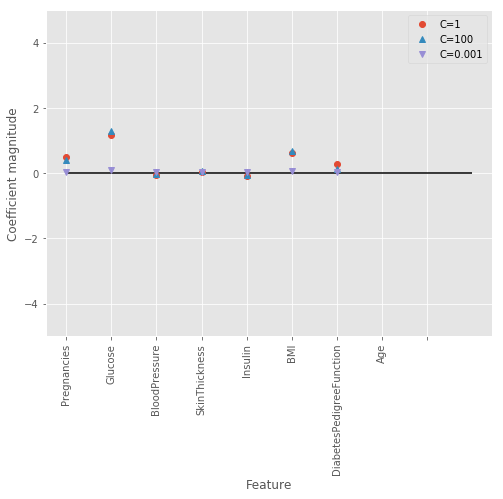

In [39]:
diabetes_features = [x for i,x in enumerate(df.columns) if i!=8]
plt.figure(figsize=(8,6))
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(df.shape[1]), diabetes_features, rotation=90)
plt.hlines(0, 0, df.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.savefig('log_coef')

* Stronger regularization (C=0.001) pushes coefficients more and more toward zero. Inspecting the plot more closely, we can also see that feature “Glucose”, for C=100, C=1 and C=0.001, the coefficient is positive. This indicates that high “Glucose” feature is related to a sample being “diabetes”.

In [40]:
X_test_predict=logreg.predict_proba(X_test)
X_test_predict.shape

(231, 2)

In [ ]:
#data = pd.DataFrame({'x': X_test_predict[:,0], 'y': y_test['Outcome'].tolist()})
#data = df.sort_values(by='x')

In [ ]:
# Below is the logistic regression equation
#sigmoid_function = expit(data['x'] * logreg.coef_[0][20] + logreg.intercept_[0]).ravel()
#plt.plot(data['x'], sigmoid_function)
#plt.scatter(data['x'], data['y'], c=data['y'], cmap='rainbow', edgecolors='b')

### ROC curve,
* plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

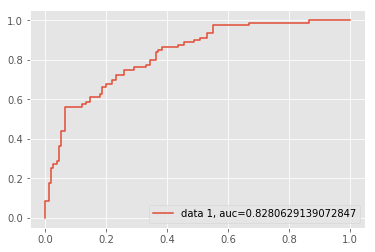

In [41]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show() 

* AUC score for the case is 0.813 here ( AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier)


### Plotting the decision boundary

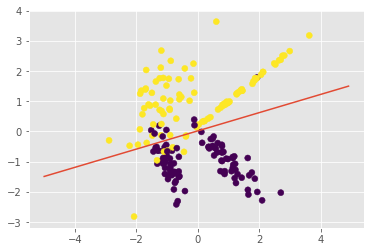

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

X, y = make_classification(200, 2, 2, 0, weights=[.5, .5], random_state=15)
clf = LogisticRegression().fit(X, y)
points_x=[x/10. for x in range(-50,+50)]

line_bias = clf.intercept_
line_w = clf.coef_.T
points_y=[(line_w[0]*x+line_bias)/(-1*line_w[1]) for x in points_x]
plt.plot(points_x, points_y)

plt.scatter(X[:,0], X[:,1],c=y)

plt.show()